PNT2022TMID26077 Testing The Model.

##IMPORT LIBRARIES

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

##unzip the file



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/dataset/Dataset.zip'

Archive:  /content/drive/MyDrive/dataset/Dataset.zip
   creating: Training_set/
   creating: Training_set/A/
  inflating: Training_set/A/1.png    
  inflating: Training_set/A/10.png   
  inflating: Training_set/A/100.png  
  inflating: Training_set/A/1000.png  
  inflating: Training_set/A/1001.png  
  inflating: Training_set/A/1002.png  
  inflating: Training_set/A/1003.png  
  inflating: Training_set/A/1004.png  
  inflating: Training_set/A/1005.png  
  inflating: Training_set/A/1006.png  
  inflating: Training_set/A/1007.png  
  inflating: Training_set/A/1008.png  
  inflating: Training_set/A/1009.png  
  inflating: Training_set/A/101.png  
  inflating: Training_set/A/1010.png  
  inflating: Training_set/A/1011.png  
  inflating: Training_set/A/1012.png  
  inflating: Training_set/A/1013.png  
  inflating: Training_set/A/1014.png  
  inflating: Training_set/A/1015.png  
  inflating: Training_set/A/1016.png  
  inflating: Training_set/A/1017.png  
  inflating: Training_set/A/1018.png 

##DATA AUGMENTATION

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Train_Set", target_size=(64,64),batch_size=100,
                                            class_mode='categorical', color_mode ="grayscale")

Found 14928 images belonging to 9 classes.


In [6]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set", target_size=(64,64),batch_size=100,
                                         class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


In [7]:
len(x_train)

150

In [8]:
len(x_test)

23

In [9]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

##MODEL BUILDING

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [11]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 1.0175 - accuracy: 0.6560 

30/30 [==============================] - 1138s 39s/step - loss: 1.0175 - accuracy: 0.6560 - val_loss: 0.4079 - val_accuracy: 0.8716
Epoch 2/10
30/30 [==============================] - 406s 13s/step - loss: 0.3143 - accuracy: 0.9020
Epoch 3/10
30/30 [==============================] - 324s 11s/step - loss: 0.1912 - accuracy: 0.9433
Epoch 4/10
30/30 [==============================] - 245s 8s/step - loss: 0.1225 - accuracy: 0.9637
Epoch 5/10
30/30 [==============================] - 187s 6s/step - loss: 0.1036 - accuracy: 0.9713
Epoch 6/10
30/30 [==============================] - 157s 5s/step - loss: 0.1051 - accuracy: 0.9697
Epoch 7/10
30/30 [==============================] - 116s 4s/step - loss: 0.0765 - accuracy: 0.9773
Epoch 8/10
30/30 [==============================] - 91s 3s/step - loss: 0.0545 - accuracy: 0.9853
Epoch 9/10
30/30 [==============================] - 73s 2s/step - loss: 0.0462 - accuracy: 0.9887
Epoch 10/10
30/30 [==============================] - 59s 2s/step - loss: 0.0

In [14]:
model.save('Real_time.h5')

##TEST THE MODEL




In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [16]:
model = load_model('/content/Real_time.h5')

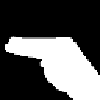

In [18]:
img = image.load_img('/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set/H/102.png',target_size = (100,100))
img

In [19]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [20]:
img=image.load_img("/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set/H/103.png")
detect(img)

1/1 [==============================] - 0s 78ms/step
THE PREDICTED LETTER IS  H


In [ ]:
img = image.load_img('/content/Dataset/test_set/A/110.png')
pred=detect(img)

1/1 [==============================] - 0s 26ms/step
THE PREDICTED LETTER IS  A


In [ ]:
img=image.load_img('/content/Dataset/test_set/E/111.png')
detect(img)

1/1 [==============================] - 0s 30ms/step
THE PREDICTED LETTER IS  E
